In [17]:
import numpy as np
import pandas as pd
from ziff.stats import BinnedStatistic

filename = '~/temp/shapes_2019_09_17_fid1.hdf'

# Get histogram
shapes = pd.read_hdf(filename)
bs = BinnedStatistic(shapes,groupby=['ccd'])
bins_u, bins_v, hist = bs.get_spatial_bs('T_data', norm_key = 'T_data', statistic = 'median',nbins=100) # Histogram on the size
# care of Nans if there are some
hist[np.isnan((hist))] = 1

# Do the interpolation
from scipy.interpolate import RegularGridInterpolator
interp = RegularGridInterpolator((bins_u[0:-1],bins_v[0:-1]), hist, bounds_error=False, fill_value=1)

# Saving
import pickle
with open('/Users/graziani/temp/interpolator.pkl', 'wb') as f:
    pickle.dump(interp, f)


<IPython.core.display.Javascript object>


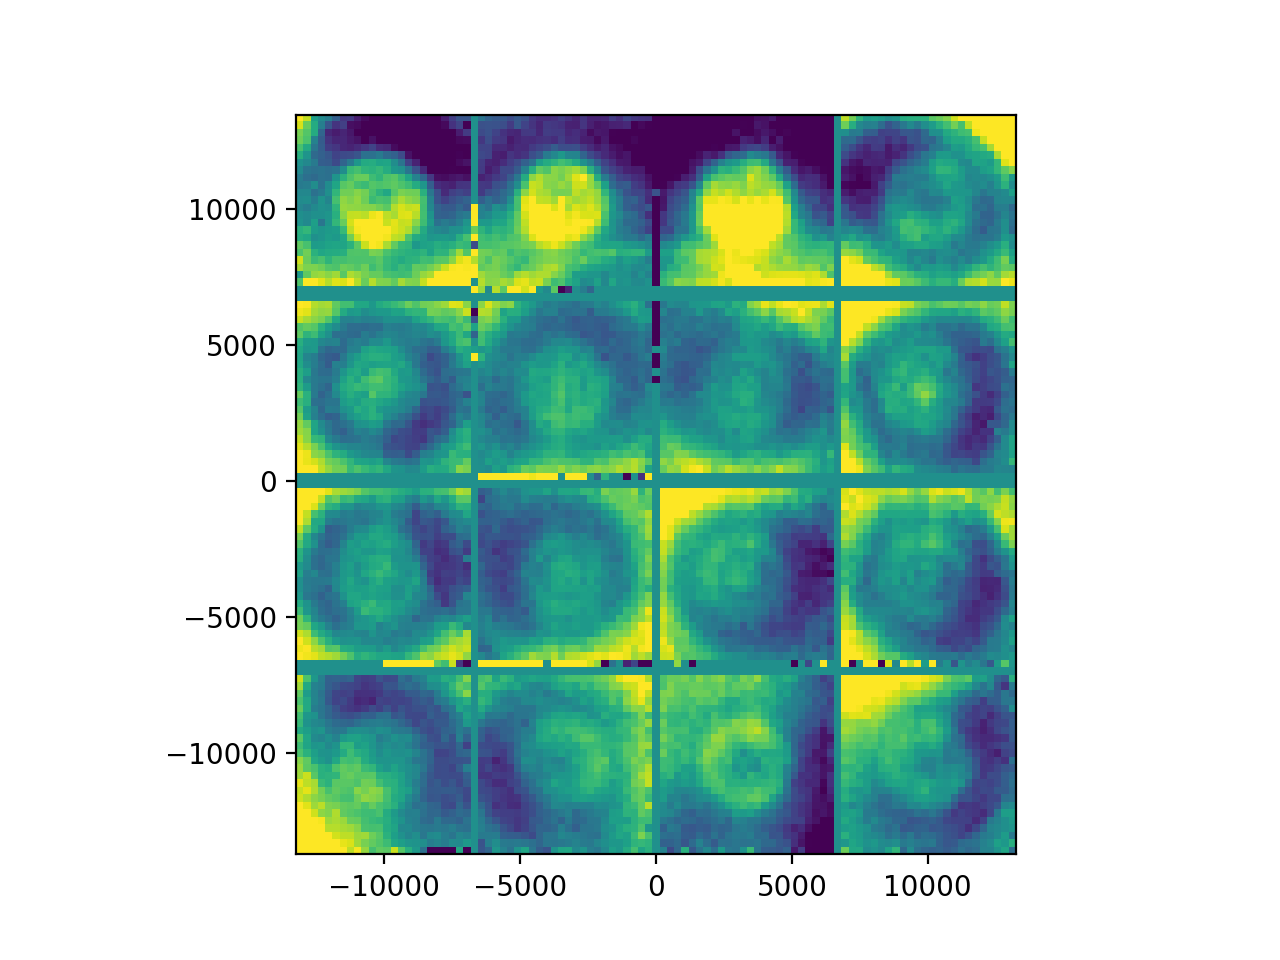

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(hist.T, origin = 'lower', extent = (bins_u[0], bins_u[-1], bins_v[0], bins_v[-1]),vmin=0.98, vmax = 1.02)

# WITH MAP

In [21]:
import ziff.ziff 
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")
imgs = ['/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q{}_sciimg.fits'.format(i+1) for i in range(4)]
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)
z.set_config_value('psf,interp,order',3)
z.set_config_value('psf,outliers,max_remove',20)
z.set_config_value('psf,interp,interpolation_map_file','/Users/graziani/temp/interpolator.pkl')
z.set_config_value('psf,interp,type','BasisPolynomialPlusMap')
z.run_piff('gaia_calibration',overwrite_cat=True)


11:20:58 INFO:test
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))


Loading default catalogs


/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/4838

11:24:45 WARNING:Using already saved catalogs
11:24:45 INFO:Reading in 4 images
11:24:46 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:24:46 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
11:24:46 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
11:24:46 WARNING:Getting wcs from image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
11:24:46 INFO:Setting pointing from keywords TELRA, TELDEC in /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:24:46 INFO:Setting pointing to: 13.931 h, 18.950 d
11:24:46 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:24:46 WAR

Processing 1/2020 Processing 2/2020 Processing 3/2020 Processing 4/2020 Processing 5/2020 Processing 6/2020 Processing 7/2020 Processing 8/2020 Processing 9/2020 Processing 10/2020 Processing 11/2020 Processing 12/2020 Processing 13/2020 Processing 14/2020 Processing 15/2020 Processing 16/2020 Processing 17/2020 Processing 18/2020 Processing 19/2020 Processing 20/2020 Processing 21/2020 Processing 22/2020 Processing 23/2020 Processing 24/2020 Processing 25/2020 Processing 26/2020 Processing 27/2020 Processing 28/2020 Processing 29/2020 Processing 30/2020 Processing 31/2020 Processing 32/2020 Processing 33/2020 Processing 34/2020 Processing 35/2020 Processing 36/2020 Processing 37/2020 Processing 38/2020 Processing 39/2020 Processing 40/2020 Processing 41/2020 Processing 42/2020 Processing 43/2020 Processing 44/2020 Processing 45/2020 Processing 46/2020 Processing 47/2020 Processing 48/2020 Processing 49/2020 Processing 50/2020 Processing 51/2020 Processing 52/2020 Processing 53/2020 Pr

Processing 418/2020 Processing 419/2020 Processing 420/2020 Processing 421/2020 Processing 422/2020 Processing 423/2020 Processing 424/2020 Processing 425/2020 Processing 426/2020 Processing 427/2020 Processing 428/2020 Processing 429/2020 Processing 430/2020 Processing 431/2020 Processing 432/2020 Processing 433/2020 Processing 434/2020 Processing 435/2020 Processing 436/2020 Processing 437/2020 Processing 438/2020 Processing 439/2020 Processing 440/2020 Processing 441/2020 Processing 442/2020 Processing 443/2020 Processing 444/2020 Processing 445/2020 Processing 446/2020 Processing 447/2020 Processing 448/2020 Processing 449/2020 Processing 450/2020 Processing 451/2020 Processing 452/2020 Processing 453/2020 Processing 454/2020 Processing 455/2020 Processing 456/2020 Processing 457/2020 Processing 458/2020 Processing 459/2020 Processing 460/2020 Processing 461/2020 Processing 462/2020 Processing 463/2020 Processing 464/2020 Processing 465/2020 Processing 466/2020 Processing 467/2020 

Processing 830/2020 Processing 831/2020 Processing 832/2020 Processing 833/2020 Processing 834/2020 Processing 835/2020 Processing 836/2020 Processing 837/2020 Processing 838/2020 Processing 839/2020 Processing 840/2020 Processing 841/2020 Processing 842/2020 Processing 843/2020 Processing 844/2020 Processing 845/2020 Processing 846/2020 Processing 847/2020 Processing 848/2020 Processing 849/2020 Processing 850/2020 Processing 851/2020 Processing 852/2020 Processing 853/2020 Processing 854/2020 Processing 855/2020 Processing 856/2020 Processing 857/2020 Processing 858/2020 Processing 859/2020 Processing 860/2020 Processing 861/2020 Processing 862/2020 Processing 863/2020 Processing 864/2020 Processing 865/2020 Processing 866/2020 Processing 867/2020 Processing 868/2020 Processing 869/2020 Processing 870/2020 Processing 871/2020 Processing 872/2020 Processing 873/2020 Processing 874/2020 Processing 875/2020 Processing 876/2020 Processing 877/2020 Processing 878/2020 Processing 879/2020 

Processing 1231/2020 Processing 1232/2020 Processing 1233/2020 Processing 1234/2020 Processing 1235/2020 Processing 1236/2020 Processing 1237/2020 Processing 1238/2020 Processing 1239/2020 Processing 1240/2020 Processing 1241/2020 Processing 1242/2020 Processing 1243/2020 Processing 1244/2020 Processing 1245/2020 Processing 1246/2020 Processing 1247/2020 Processing 1248/2020 Processing 1249/2020 Processing 1250/2020 Processing 1251/2020 Processing 1252/2020 Processing 1253/2020 Processing 1254/2020 Processing 1255/2020 Processing 1256/2020 Processing 1257/2020 Processing 1258/2020 Processing 1259/2020 Processing 1260/2020 Processing 1261/2020 Processing 1262/2020 Processing 1263/2020 Processing 1264/2020 Processing 1265/2020 Processing 1266/2020 Processing 1267/2020 Processing 1268/2020 Processing 1269/2020 Processing 1270/2020 Processing 1271/2020 Processing 1272/2020 Processing 1273/2020 Processing 1274/2020 Processing 1275/2020 Processing 1276/2020 Processing 1277/2020 Processing 12

Processing 1622/2020 Processing 1623/2020 Processing 1624/2020 Processing 1625/2020 Processing 1626/2020 Processing 1627/2020 Processing 1628/2020 Processing 1629/2020 Processing 1630/2020 Processing 1631/2020 Processing 1632/2020 Processing 1633/2020 Processing 1634/2020 Processing 1635/2020 Processing 1636/2020 Processing 1637/2020 Processing 1638/2020 Processing 1639/2020 Processing 1640/2020 Processing 1641/2020 Processing 1642/2020 Processing 1643/2020 Processing 1644/2020 Processing 1645/2020 Processing 1646/2020 Processing 1647/2020 Processing 1648/2020 Processing 1649/2020 Processing 1650/2020 Processing 1651/2020 Processing 1652/2020 Processing 1653/2020 Processing 1654/2020 Processing 1655/2020 Processing 1656/2020 Processing 1657/2020 Processing 1658/2020 Processing 1659/2020 Processing 1660/2020 Processing 1661/2020 Processing 1662/2020 Processing 1663/2020 Processing 1664/2020 Processing 1665/2020 Processing 1666/2020 Processing 1667/2020 Processing 1668/2020 Processing 16

Processing 2015/2020 Processing 2016/2020 Processing 2017/2020 Processing 2018/2020 Processing 2019/2020 Processing 2020/2020 

<IPython.core.display.Javascript object>


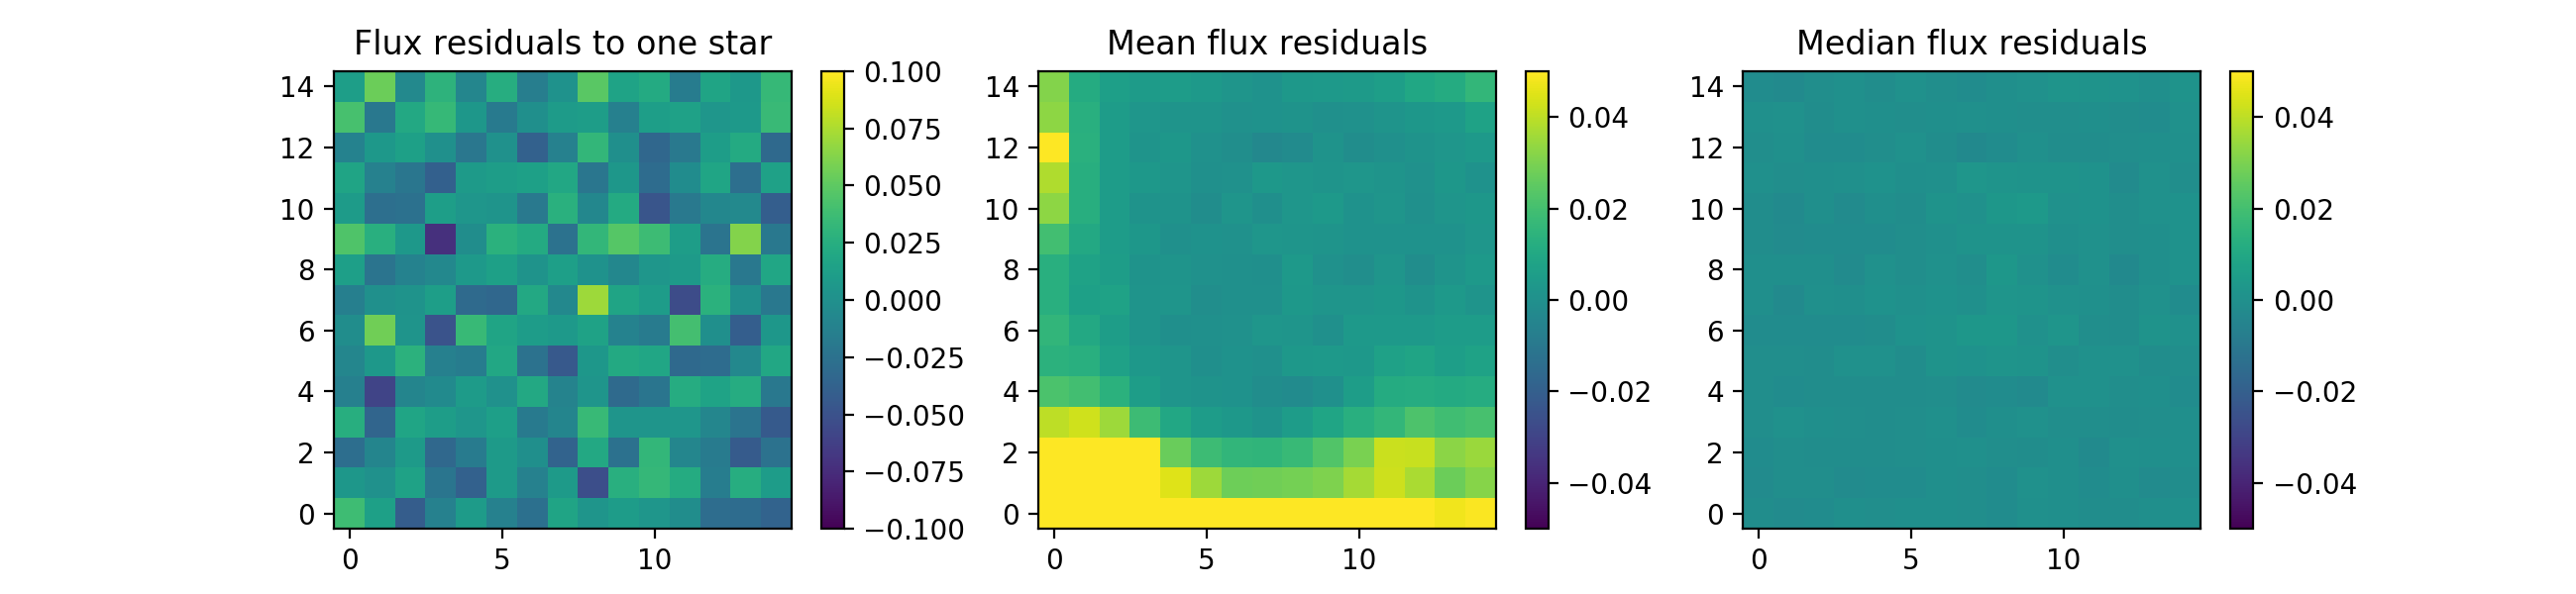

In [23]:
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=False,append_df_keys = ['RPmag','BPmag','Gmag','colormag','sky','xpos','ypos'])
new_stars = z.reflux_stars(stars,fit_center=True, which='minuit')
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)
import numpy as np
import matplotlib.pyplot as P
fig, axes = P.subplots(1,3,figsize=(13,3))
im_kwargs  = {'origin':'lower', 'vmin' : -0.1, 'vmax': 0.1}
i = axes[0].imshow(res[0].T, **im_kwargs)
fig.colorbar(i,ax=axes[0])
axes[0].set_title('Flux residuals to one star')
im_kwargs  = {'origin':'lower', 'vmin' : -0.05, 'vmax': 0.05}
axes[1].set_title('Mean flux residuals')
i = axes[1].imshow(np.mean(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[1])

axes[2].set_title('Median flux residuals')
i = axes[2].imshow(np.median(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[2])



<IPython.core.display.Javascript object>


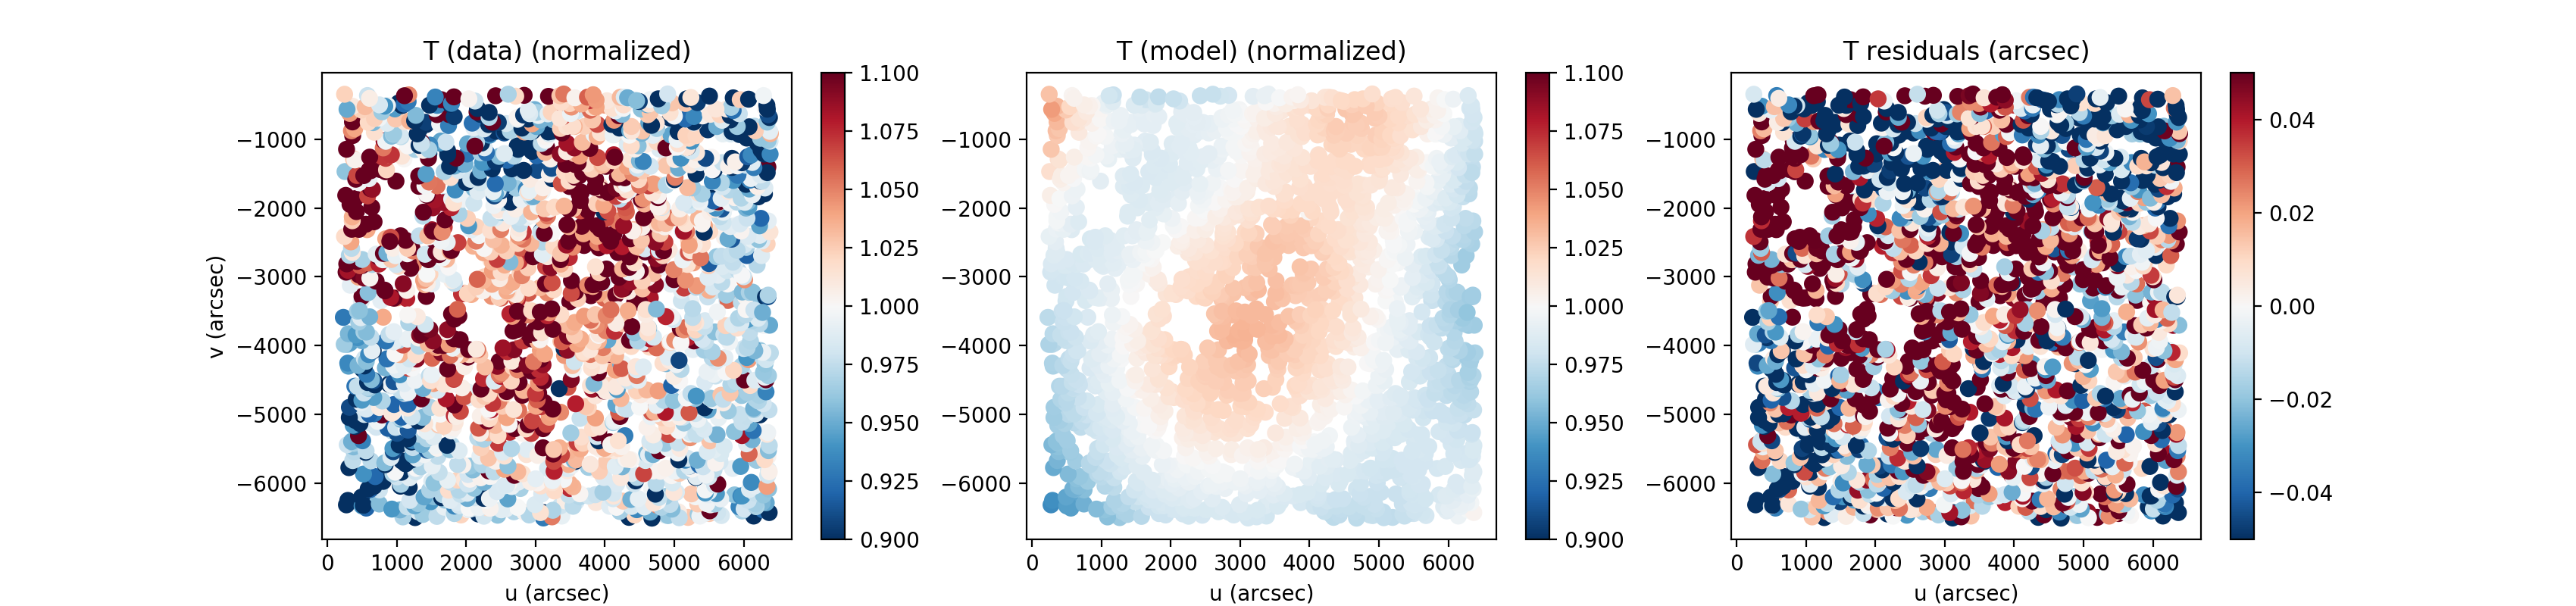

In [24]:
fig, axes = P.subplots(1,3,figsize=(17,4))
scat_kwargs = {'cmap':'RdBu_r', 's':50}

s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[0].set_title('T (data) (normalized)')
axes[0].set_xlabel('u (arcsec)')
axes[0].set_ylabel('v (arcsec)')

fig.colorbar(s,ax=axes[0])

s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[1].set_xlabel('u (arcsec)')
axes[1].set_title('T (model) (normalized)')
fig.colorbar(s,ax=axes[1])


s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),vmin=-0.05,vmax=0.05,**scat_kwargs)
axes[2].set_xlabel('u (arcsec)')
axes[2].set_title('T residuals (arcsec)')
fig.colorbar(s,ax=axes[2])

# WITHOUT MAP

11:28:42 INFO:test
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))


Loading default catalogs


/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_gaia_calibration.fits
  warnings.warn("WARNING: Overwritting {}".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:323: UserWarning: WARNING: File /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_gaia_calibration.fits already exists
  warnings.warn("WARNING: File {} already exists".format(path))
/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/catalog.py:325: UserWarning: WARNING: Overwritting /Users/graziani/Data/ZTF/sci/2019/0301/4838

Processing 1/2020 Processing 2/2020 Processing 3/2020 Processing 4/2020 Processing 5/2020 Processing 6/2020 Processing 7/2020 Processing 8/2020 Processing 9/2020 Processing 10/2020 Processing 11/2020 Processing 12/2020 Processing 13/2020 Processing 14/2020 Processing 15/2020 Processing 16/2020 Processing 17/2020 Processing 18/2020 Processing 19/2020 Processing 20/2020 Processing 21/2020 Processing 22/2020 Processing 23/2020 Processing 24/2020 Processing 25/2020 Processing 26/2020 Processing 27/2020 Processing 28/2020 Processing 29/2020 Processing 30/2020 Processing 31/2020 Processing 32/2020 Processing 33/2020 Processing 34/2020 Processing 35/2020 Processing 36/2020 Processing 37/2020 Processing 38/2020 Processing 39/2020 Processing 40/2020 Processing 41/2020 Processing 42/2020 Processing 43/2020 Processing 44/2020 Processing 45/2020 Processing 46/2020 Processing 47/2020 Processing 48/2020 Processing 49/2020 Processing 50/2020 Processing 51/2020 Processing 52/2020 Processing 53/2020 Pr

Processing 419/2020 Processing 420/2020 Processing 421/2020 Processing 422/2020 Processing 423/2020 Processing 424/2020 Processing 425/2020 Processing 426/2020 Processing 427/2020 Processing 428/2020 Processing 429/2020 Processing 430/2020 Processing 431/2020 Processing 432/2020 Processing 433/2020 Processing 434/2020 Processing 435/2020 Processing 436/2020 Processing 437/2020 Processing 438/2020 Processing 439/2020 Processing 440/2020 Processing 441/2020 Processing 442/2020 Processing 443/2020 Processing 444/2020 Processing 445/2020 Processing 446/2020 Processing 447/2020 Processing 448/2020 Processing 449/2020 Processing 450/2020 Processing 451/2020 Processing 452/2020 Processing 453/2020 Processing 454/2020 Processing 455/2020 Processing 456/2020 Processing 457/2020 Processing 458/2020 Processing 459/2020 Processing 460/2020 Processing 461/2020 Processing 462/2020 Processing 463/2020 Processing 464/2020 Processing 465/2020 Processing 466/2020 Processing 467/2020 Processing 468/2020 

Processing 831/2020 Processing 832/2020 Processing 833/2020 Processing 834/2020 Processing 835/2020 Processing 836/2020 Processing 837/2020 Processing 838/2020 Processing 839/2020 Processing 840/2020 Processing 841/2020 Processing 842/2020 Processing 843/2020 Processing 844/2020 Processing 845/2020 Processing 846/2020 Processing 847/2020 Processing 848/2020 Processing 849/2020 Processing 850/2020 Processing 851/2020 Processing 852/2020 Processing 853/2020 Processing 854/2020 Processing 855/2020 Processing 856/2020 Processing 857/2020 Processing 858/2020 Processing 859/2020 Processing 860/2020 Processing 861/2020 Processing 862/2020 Processing 863/2020 Processing 864/2020 Processing 865/2020 Processing 866/2020 Processing 867/2020 Processing 868/2020 Processing 869/2020 Processing 870/2020 Processing 871/2020 Processing 872/2020 Processing 873/2020 Processing 874/2020 Processing 875/2020 Processing 876/2020 Processing 877/2020 Processing 878/2020 Processing 879/2020 Processing 880/2020 

Processing 1231/2020 Processing 1232/2020 Processing 1233/2020 Processing 1234/2020 Processing 1235/2020 Processing 1236/2020 Processing 1237/2020 Processing 1238/2020 Processing 1239/2020 Processing 1240/2020 Processing 1241/2020 Processing 1242/2020 Processing 1243/2020 Processing 1244/2020 Processing 1245/2020 Processing 1246/2020 Processing 1247/2020 Processing 1248/2020 Processing 1249/2020 Processing 1250/2020 Processing 1251/2020 Processing 1252/2020 Processing 1253/2020 Processing 1254/2020 Processing 1255/2020 Processing 1256/2020 Processing 1257/2020 Processing 1258/2020 Processing 1259/2020 Processing 1260/2020 Processing 1261/2020 Processing 1262/2020 Processing 1263/2020 Processing 1264/2020 Processing 1265/2020 Processing 1266/2020 Processing 1267/2020 Processing 1268/2020 Processing 1269/2020 Processing 1270/2020 Processing 1271/2020 Processing 1272/2020 Processing 1273/2020 Processing 1274/2020 Processing 1275/2020 Processing 1276/2020 Processing 1277/2020 Processing 12

Processing 1623/2020 Processing 1624/2020 Processing 1625/2020 Processing 1626/2020 Processing 1627/2020 Processing 1628/2020 Processing 1629/2020 Processing 1630/2020 Processing 1631/2020 Processing 1632/2020 Processing 1633/2020 Processing 1634/2020 Processing 1635/2020 Processing 1636/2020 Processing 1637/2020 Processing 1638/2020 Processing 1639/2020 Processing 1640/2020 Processing 1641/2020 Processing 1642/2020 Processing 1643/2020 Processing 1644/2020 Processing 1645/2020 Processing 1646/2020 Processing 1647/2020 Processing 1648/2020 Processing 1649/2020 Processing 1650/2020 Processing 1651/2020 Processing 1652/2020 Processing 1653/2020 Processing 1654/2020 Processing 1655/2020 Processing 1656/2020 Processing 1657/2020 Processing 1658/2020 Processing 1659/2020 Processing 1660/2020 Processing 1661/2020 Processing 1662/2020 Processing 1663/2020 Processing 1664/2020 Processing 1665/2020 Processing 1666/2020 Processing 1667/2020 Processing 1668/2020 Processing 1669/2020 Processing 16

Processing 2016/2020 Processing 2017/2020 Processing 2018/2020 Processing 2019/2020 Processing 2020/2020 

<IPython.core.display.Javascript object>


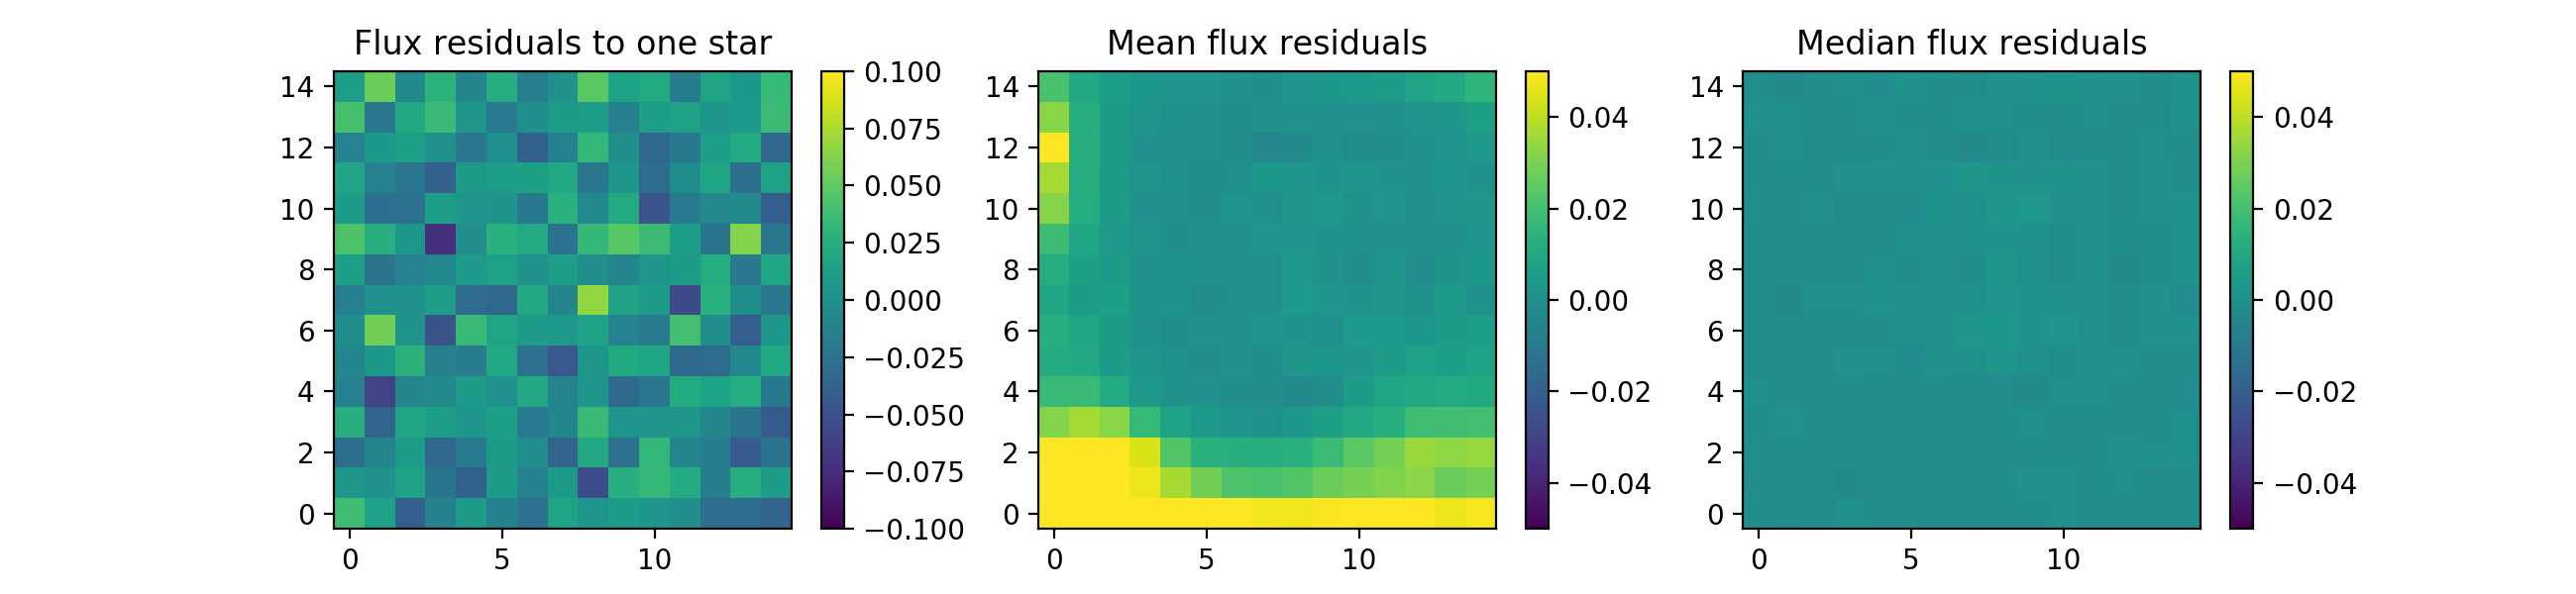

<IPython.core.display.Javascript object>


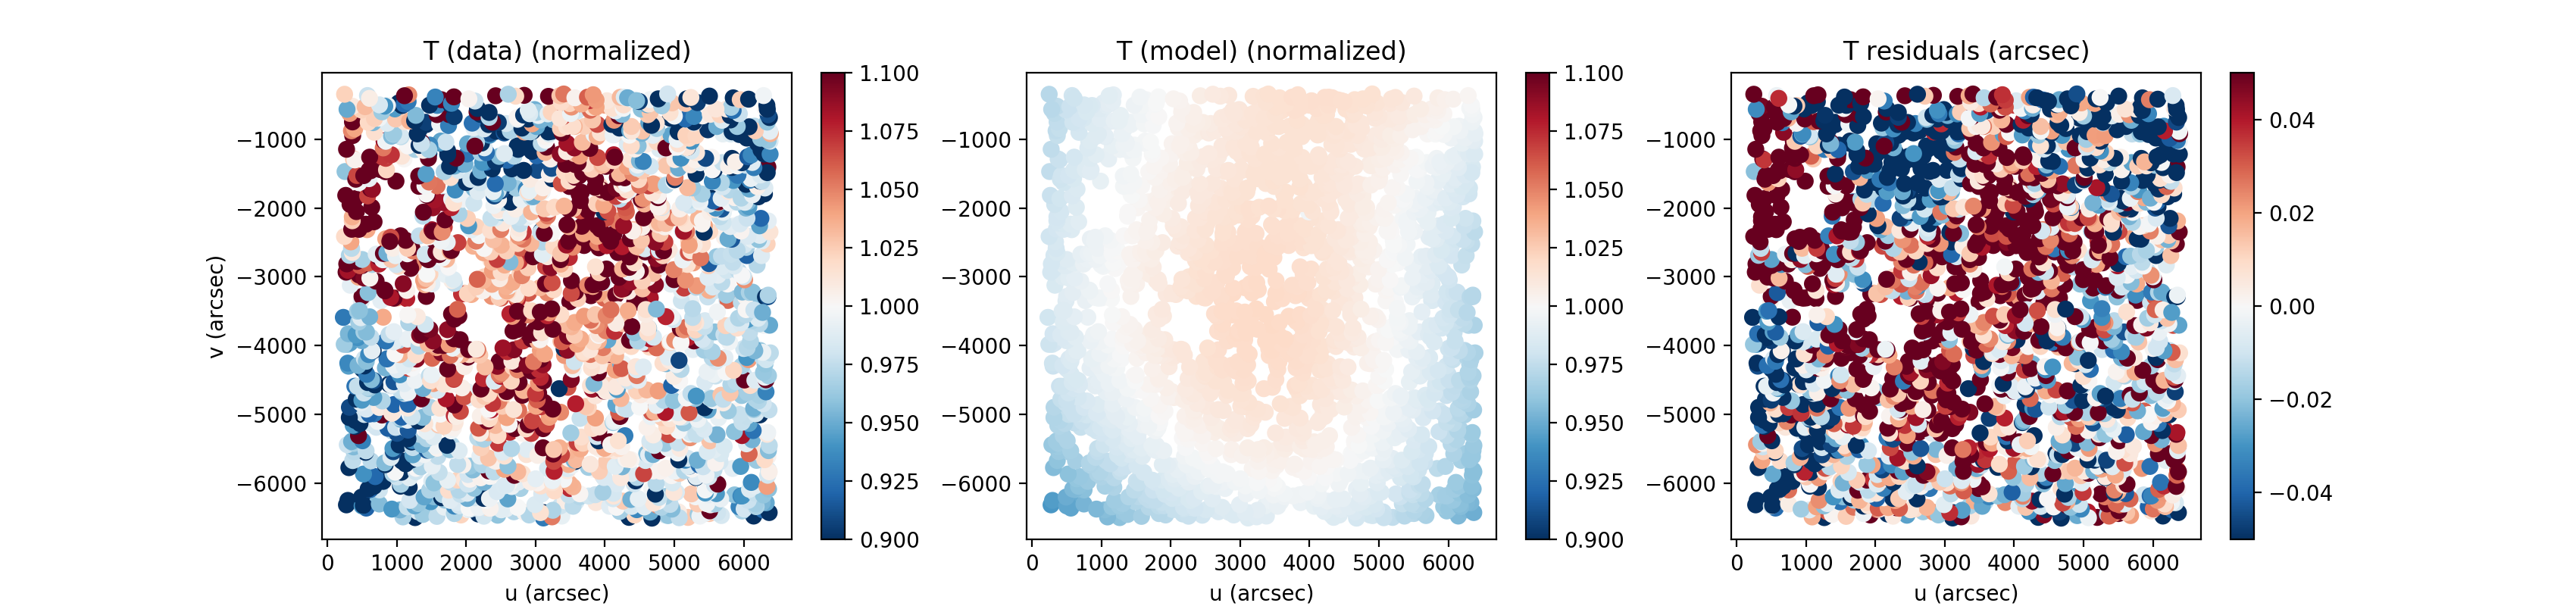

In [25]:
import ziff.ziff 
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")
imgs = ['/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q{}_sciimg.fits'.format(i+1) for i in range(4)]
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)
z.set_config_value('psf,interp,order',3)
z.set_config_value('psf,outliers,max_remove',20)
z.run_piff('gaia_calibration',overwrite_cat=True)
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=False,append_df_keys = ['RPmag','BPmag','Gmag','colormag','sky','xpos','ypos'])
new_stars = z.reflux_stars(stars,fit_center=True, which='minuit')
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)
import numpy as np
import matplotlib.pyplot as P
fig, axes = P.subplots(1,3,figsize=(13,3))
im_kwargs  = {'origin':'lower', 'vmin' : -0.1, 'vmax': 0.1}
i = axes[0].imshow(res[0].T, **im_kwargs)
fig.colorbar(i,ax=axes[0])
axes[0].set_title('Flux residuals to one star')
im_kwargs  = {'origin':'lower', 'vmin' : -0.05, 'vmax': 0.05}
axes[1].set_title('Mean flux residuals')
i = axes[1].imshow(np.mean(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[1])

axes[2].set_title('Median flux residuals')
i = axes[2].imshow(np.median(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[2])
fig, axes = P.subplots(1,3,figsize=(17,4))
scat_kwargs = {'cmap':'RdBu_r', 's':50}

s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[0].set_title('T (data) (normalized)')
axes[0].set_xlabel('u (arcsec)')
axes[0].set_ylabel('v (arcsec)')

fig.colorbar(s,ax=axes[0])

s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),vmin=0.9,vmax=1.1,**scat_kwargs)
axes[1].set_xlabel('u (arcsec)')
axes[1].set_title('T (model) (normalized)')
fig.colorbar(s,ax=axes[1])


s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),vmin=-0.05,vmax=0.05,**scat_kwargs)
axes[2].set_xlabel('u (arcsec)')
axes[2].set_title('T residuals (arcsec)')
fig.colorbar(s,ax=axes[2])



# REAL MAP

<IPython.core.display.Javascript object>


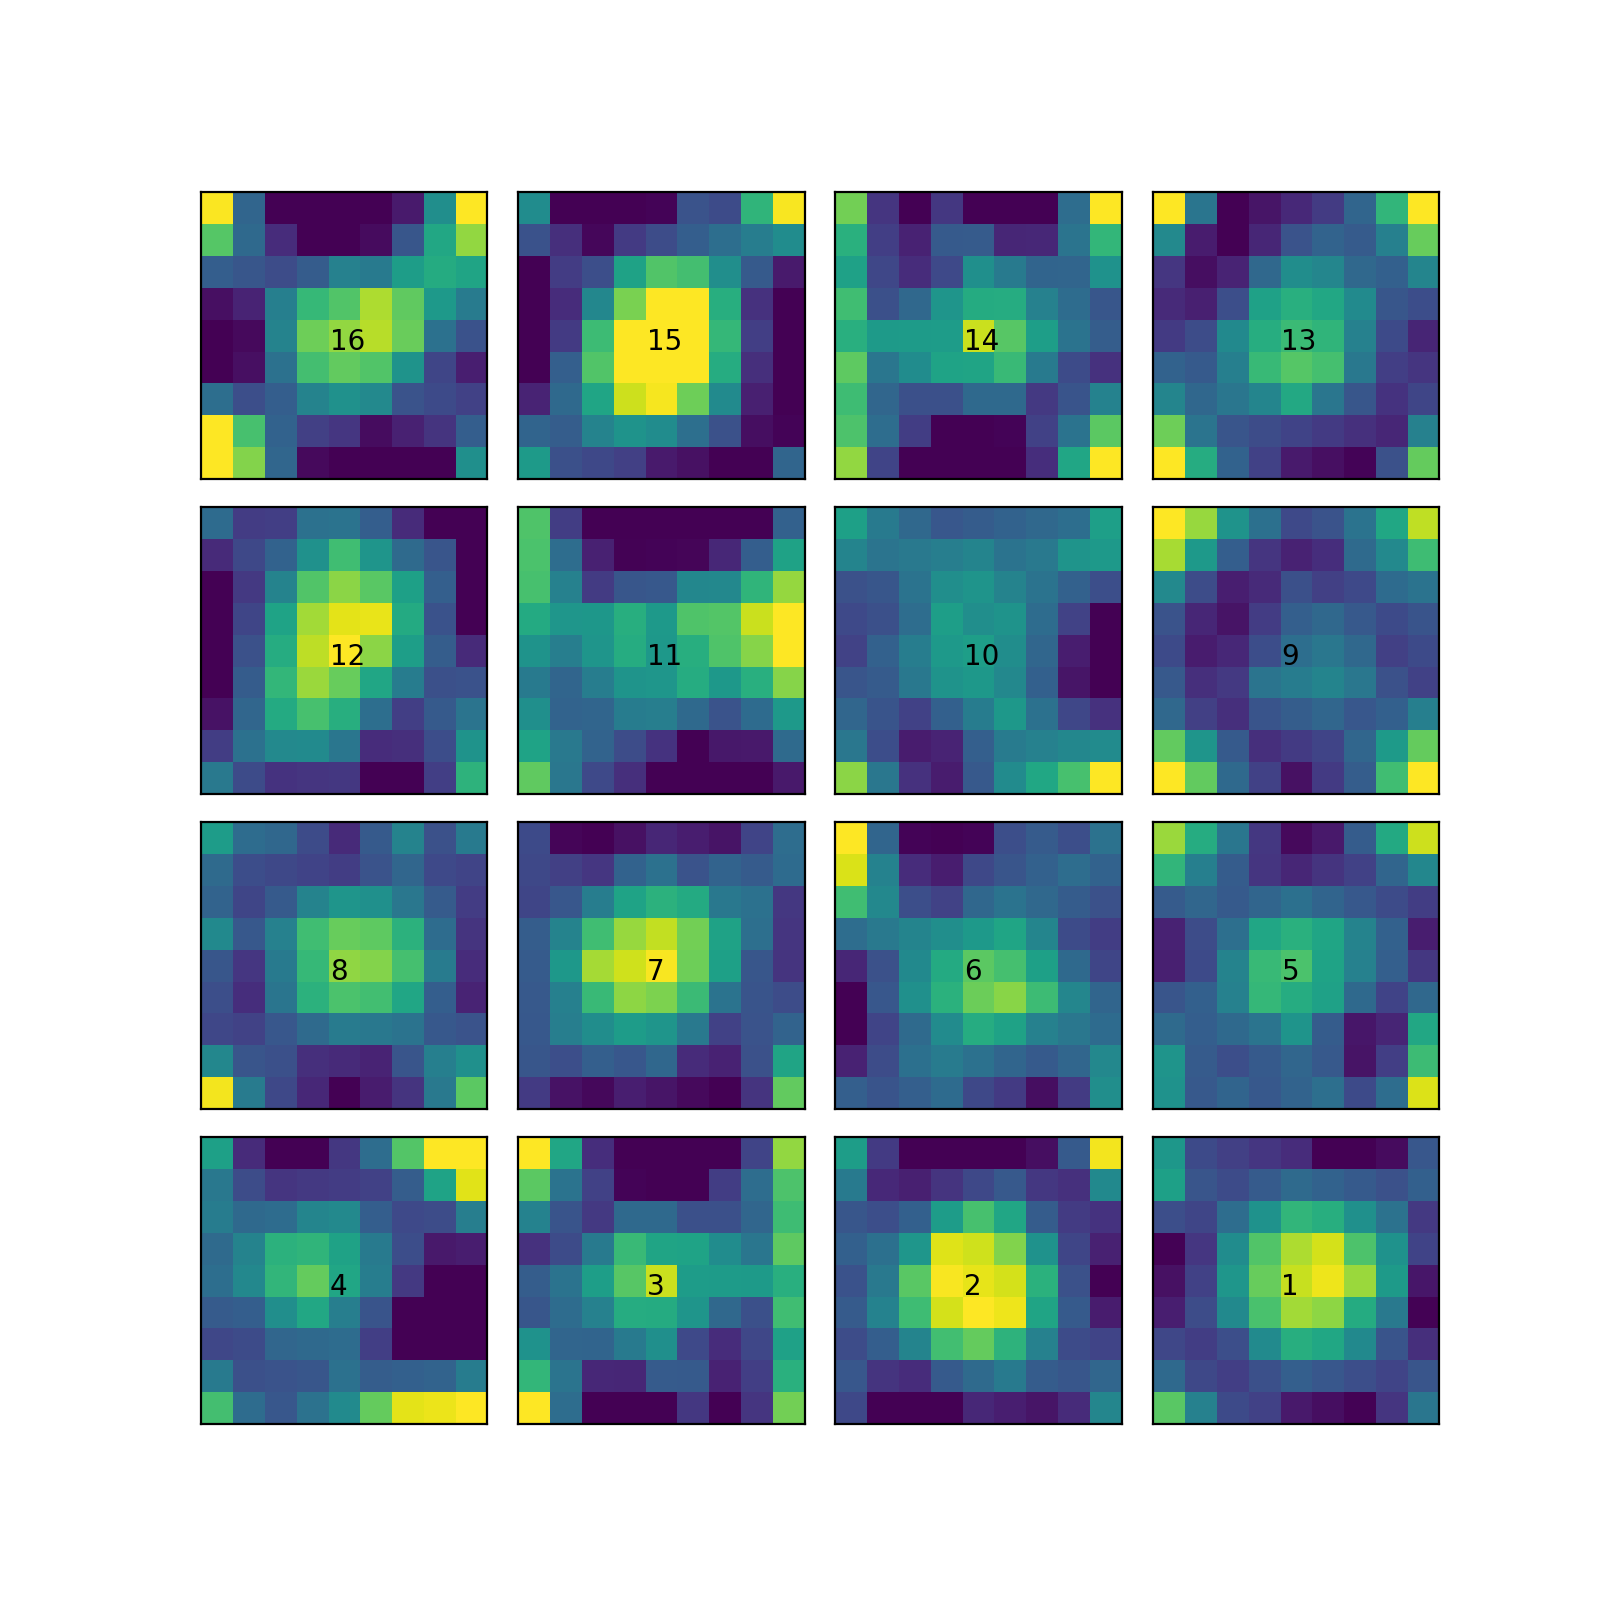

In [24]:
path = '/Users/graziani/libs/Ziff/ziff/data/'
names = {1:'12451-09-01',2:'12451-02-01',3:'10353-17-01',4:'12472-08-01',5:'13422-15-01',6:'13481-02-01',7:'13451-13-01',
         8:'13422-20-01',9:'13451-22-01',10:'13422-19-01',11:'13413-01-01',12:'13481-12-01',13:'12423-04-01',14:'10353-17-01',
         15:'10353-02-01',16:'12461-15-01'}
suffix = '_post-burnin_flatness.xls'
import numpy as np

rotated = [1,2,5,6,9,10,13,14]
def read_file(filename='/Users/graziani/libs/Ziff/ziff/data/10353-02-01_post burnin_flatness.xls'):
    df = pd.read_excel(filename,header=15,usecols='L:N',nrows=81,names='X Y Z'.split())
    df = pd.read_excel(filename,header=15,usecols='T:V',nrows=81,names='X Y Z'.split())
    return df

def read_plane(filename):
    df = pd.read_excel(filename,header=15,usecols='Z:AI',nrows=9,index_col=0)
    return df

def plot_plane(df,ax = None):
    if ax is None:
        fig, ax = P.subplots()
    s = ax.imshow(df.values.T,origin='lower')
    P.colorbar(s)
    return ax
    
def plot_thickness():
    fig, axes = P.subplots(4,4,figsize=(8,8),gridspec_kw={'hspace':0.1,'wspace':0.1})
    for i in range(4):
        for j in range(4):
            ccdindex = i+1+4*j
            y = 3-j
            x = 3-i #3-j
            df = read_plane(path + names[ccdindex] + suffix)
            # In order x,y needs to inverse x,y that's why there is a .T
            values = np.rot90(df.values,2)
            if ccdindex in rotated:
                #If rotated there is a 180deg rotation
                values = np.rot90(values,2)
            # Centering on 0
            #z = df['Z'] - N.median(df['Z'])
            #vmax = N.max(N.abs(z))    
            #vmax = 0.02
            #s = axes[y,x].scatter(df['ra'],df['dec'],c=z,vmin=-vmax,vmax=vmax,marker='s',s=130)
            
            #Now the .T is because usual axis=0 means y in numpy
            s = axes[y,x].imshow(values.T,origin='lower',vmin=-4,vmax=7,extent=(0,100,0,100))
            #fig.colorbar(s,ax=axes[y,x])
            axes[y,x].text(45,45,'{}'.format(ccdindex))
            #axes[y,x].set_title('{}'.format(ccdindex))
            axes[y,x].get_xaxis().set_visible(False)
            axes[y,x].get_yaxis().set_visible(False)

    return fig, axes
%matplotlib notebook
fig, axes = plot_thickness()
fig.savefig('/Users/graziani/temp/ccd_thickness.pdf')


In [6]:
X = -0.402,11.2,22.8,34.4,46,57.6,69.2,80.8,92.401
Y = 0.501,12.401,24.301,36.201,48.101,60.001,71.901,83.801,95.701

Z = [[7,1,-3,-6,-7,-8,-6,-4,-0],
[3,1,-1,-2,-2,-3,-3,-4,-4],
[-1,-0,1,3,3,3,1,-1,-5],
[-1,-1,4,7,8,7,5,0,-4],
[-4,-1,4,7,9,8,7,1,-3],
[-5,-2,2,5,7,9,6,2,-2],
[-5,-4,-1,1,4,4,2,1,-2],
[-4,-3,-2,-3,-2,-1,-0,-1,-1],
[1,-1,-5,-6,-6,-4,-3,-0,2]]

<IPython.core.display.Javascript object>


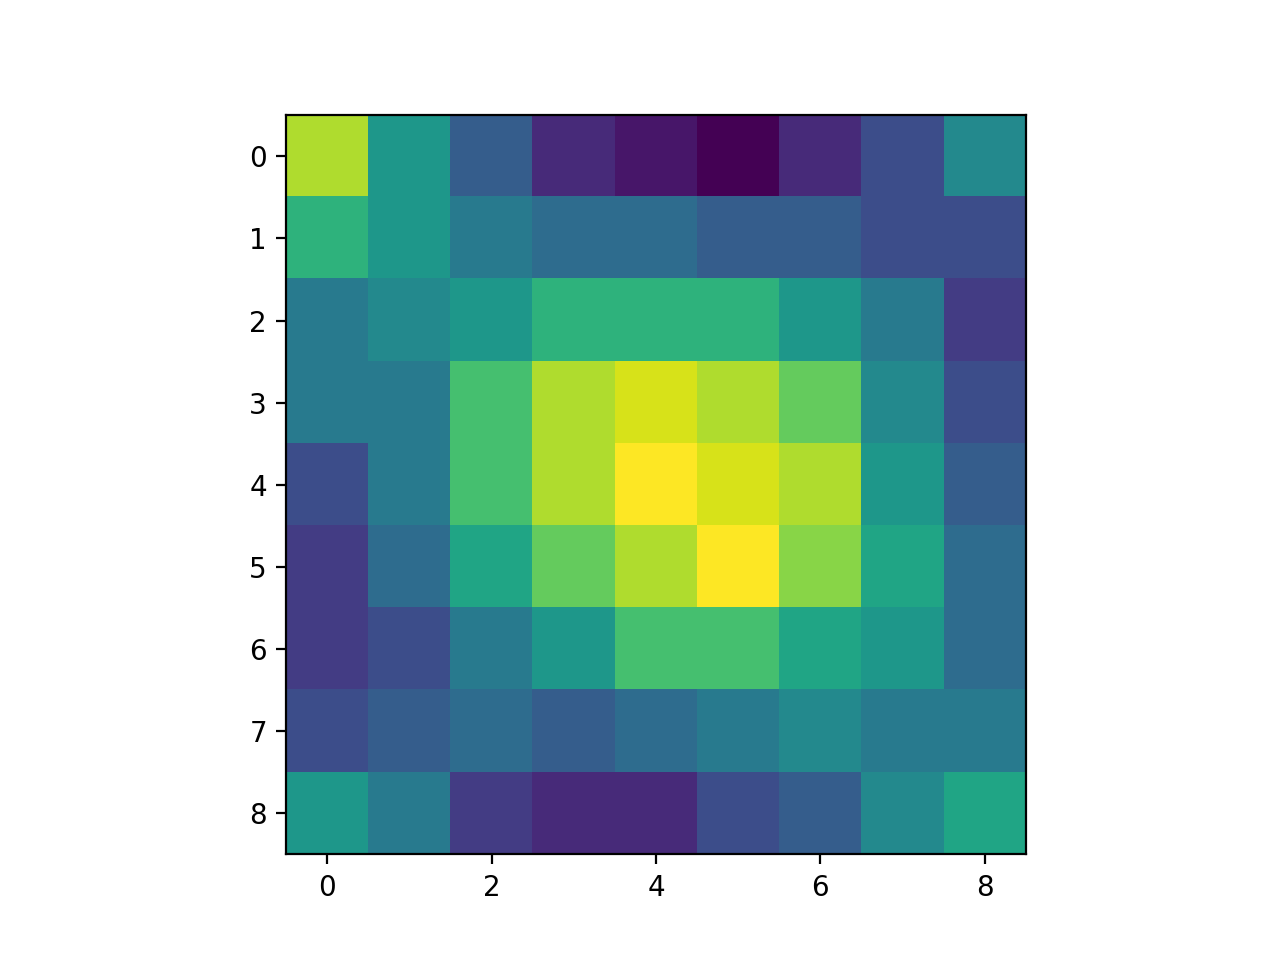

In [7]:
fig, ax = P.subplots()
ax.imshow(Z)

         -0.402     11.200    22.800    34.400    46.000    57.600    69.200  \
0.501   6.900448  1.356395 -3.183945 -5.724058 -7.264397 -7.804963 -6.345303   
12.401  3.206022  0.660112 -0.882085 -2.420341 -1.960907 -2.501246 -3.041586   
24.301 -1.490261 -0.036171  1.423490  2.883377  3.343037  2.802698  1.262131   
36.201 -1.188400 -0.732227  3.727207  7.187094  7.646754  7.106188  4.566075   
48.101 -3.884683 -1.428737  4.030924  7.490811  8.950471  8.408275  6.869566   
60.001 -4.580966 -2.124793  2.334868  4.796385  7.254189  8.711992  6.173283   
71.901 -5.275392 -3.821076 -1.361415  1.098245  3.559763  4.017340  2.475143   
83.801 -3.971675 -2.517585 -2.057925 -2.598038 -2.138377 -0.680800 -0.219283   
95.701  1.332042 -1.215498 -4.754207 -6.294320 -5.834660 -4.377083 -2.915566   

          80.800    92.401  
0.501  -3.885416 -0.427612  
12.401 -3.581925 -4.123895  
24.301 -1.277982 -4.820178  
36.201  0.025509 -3.514604  
48.101  1.331310 -3.212744  
60.001  1.631313 -1.90717

<IPython.core.display.Javascript object>


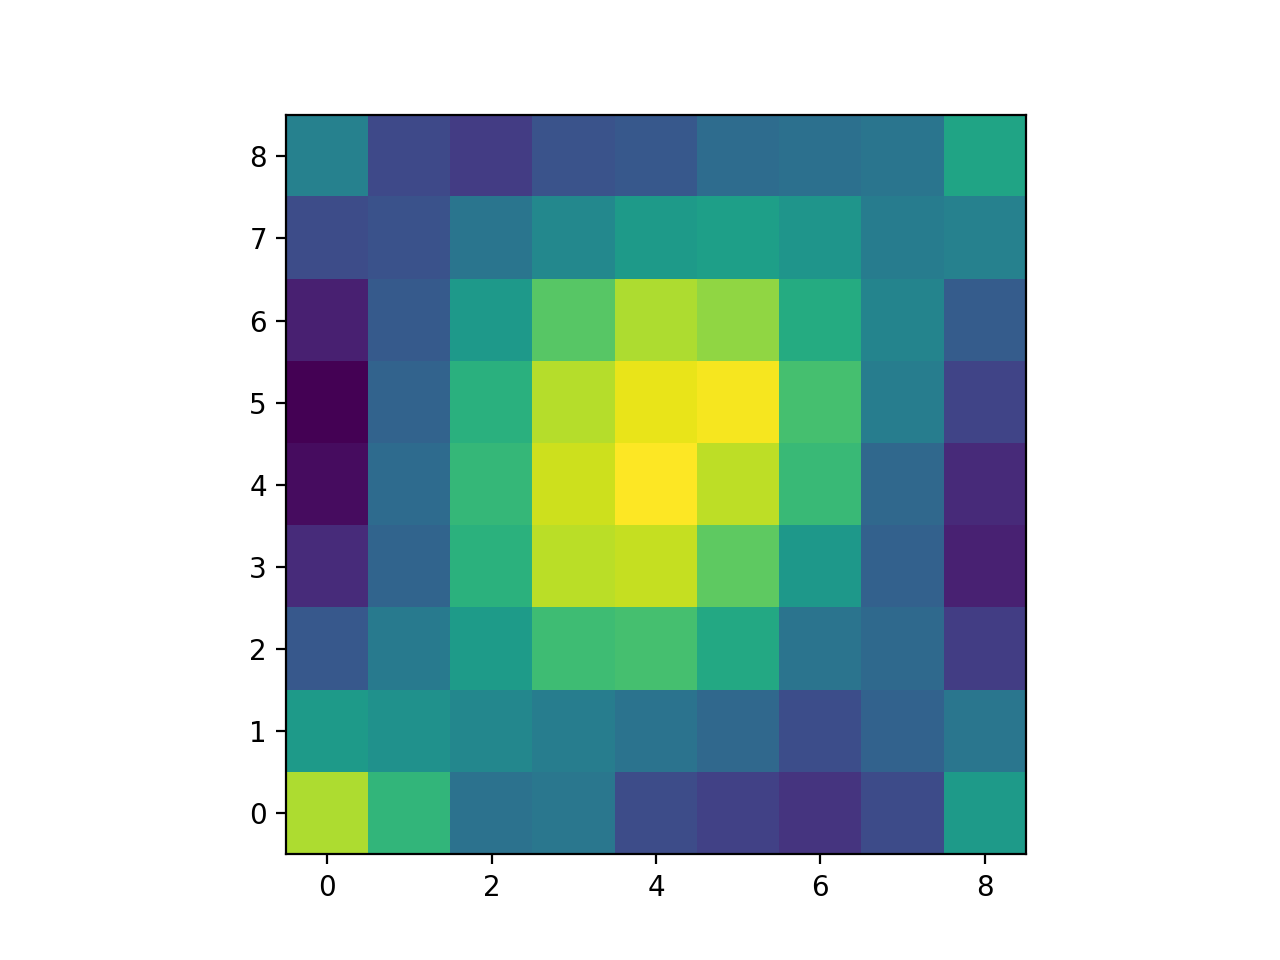

In [15]:
filename='/Users/graziani/libs/Ziff/ziff/data/10353-02-01_post-burnin_flatness.xls'
df = pd.read_excel(filename,header=15,usecols='Z:AI',nrows=9,index_col=0)
print(df)
fig, ax = P.subplots()
ax.imshow(df.values.T,origin='lower')

In [ ]:
a = N.arange()